In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [281]:
penguins = pd.read_csv('penguins_lter.csv')
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [282]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [283]:
penguins.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [284]:
col = penguins['studyName']
print(np.unique(col.values))

['PAL0708' 'PAL0809' 'PAL0910']


In [285]:
penguin = penguins.drop(columns=['Region', 'Individual ID', 'Comments', 'Date Egg', 'Stage'])
penguin

,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [286]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 32.4+ KB


In [287]:
enc = OrdinalEncoder()
penguin[['studName', 'Islan', 'Clutch Completi', 'sex']] = enc.fit_transform(penguin[['studyName', 'Island', 'Clutch Completion', 'Sex']]) 
penguin

,studyName,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),studName,Islan,Clutch Completi,sex
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,0.0,2.0,1.0,2.0
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,0.0,2.0,1.0,1.0
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,0.0,2.0,1.0,1.0
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,2.0,0.0,1.0,1.0
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,2.0,0.0,1.0,2.0
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,2.0,0.0,1.0,1.0


In [289]:
pengui = penguin.drop(columns =['studyName', 'Island', 'Clutch Completion', 'Sex']) 
pengui

,Sample Number,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studName,Islan,Clutch Completi,sex
0,1,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,NaN,NaN,0.0,2.0,1.0,2.0
1,2,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454,0.0,2.0,1.0,1.0
2,3,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302,0.0,2.0,1.0,1.0
3,4,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
4,5,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,120,Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN
340,121,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,8.41151,-26.13832,2.0,0.0,1.0,1.0
341,122,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,8.30166,-26.04117,2.0,0.0,1.0,2.0
342,123,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,8.24246,-26.11969,2.0,0.0,1.0,1.0


In [290]:
pengui.isna().sum()

Sample Number           0
Species                 0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
studName                0
Islan                   0
Clutch Completi         0
sex                    10
dtype: int64

In [291]:
pengu = pengui.fillna(value=penguin.median())
pengu

C:\Users\Saheed\AppData\Local\Temp\ipykernel_11800\326254676.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pengu = pengui.fillna(value=penguin.median())


,Sample Number,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studName,Islan,Clutch Completi,sex
0,1,Adelie Penguin (Pygoscelis adeliae),39.10,18.7,181.0,3750.0,8.652405,-25.83352,0.0,2.0,1.0,2.0
1,2,Adelie Penguin (Pygoscelis adeliae),39.50,17.4,186.0,3800.0,8.949560,-24.69454,0.0,2.0,1.0,1.0
2,3,Adelie Penguin (Pygoscelis adeliae),40.30,18.0,195.0,3250.0,8.368210,-25.33302,0.0,2.0,1.0,1.0
3,4,Adelie Penguin (Pygoscelis adeliae),44.45,17.3,197.0,4050.0,8.652405,-25.83352,0.0,2.0,1.0,2.0
4,5,Adelie Penguin (Pygoscelis adeliae),36.70,19.3,193.0,3450.0,8.766510,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,120,Gentoo penguin (Pygoscelis papua),44.45,17.3,197.0,4050.0,8.652405,-25.83352,2.0,0.0,0.0,2.0
340,121,Gentoo penguin (Pygoscelis papua),46.80,14.3,215.0,4850.0,8.411510,-26.13832,2.0,0.0,1.0,1.0
341,122,Gentoo penguin (Pygoscelis papua),50.40,15.7,222.0,5750.0,8.301660,-26.04117,2.0,0.0,1.0,2.0
342,123,Gentoo penguin (Pygoscelis papua),45.20,14.8,212.0,5200.0,8.242460,-26.11969,2.0,0.0,1.0,1.0


In [292]:
pengu['sex'].value_counts()

2.0    178
1.0    165
0.0      1
Name: sex, dtype: int64

In [293]:
pengu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample Number        344 non-null    int64  
 1   Species              344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Delta 15 N (o/oo)    344 non-null    float64
 7   Delta 13 C (o/oo)    344 non-null    float64
 8   studName             344 non-null    float64
 9   Islan                344 non-null    float64
 10  Clutch Completi      344 non-null    float64
 11  sex                  344 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 32.4+ KB


<AxesSubplot:xlabel='Sample Number', ylabel='Species'>

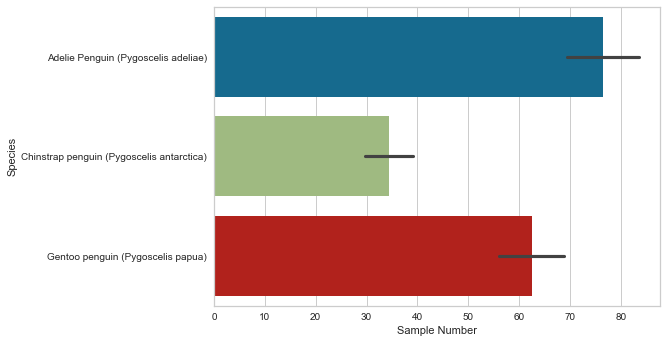

In [338]:
sns.barplot(x="Sample Number", y="Species", data=pengu)

The Adelie Penguin (Pygoscelis adeliae) specie is the larger and has the highest number of samples gathered for this dataset.

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Species'>

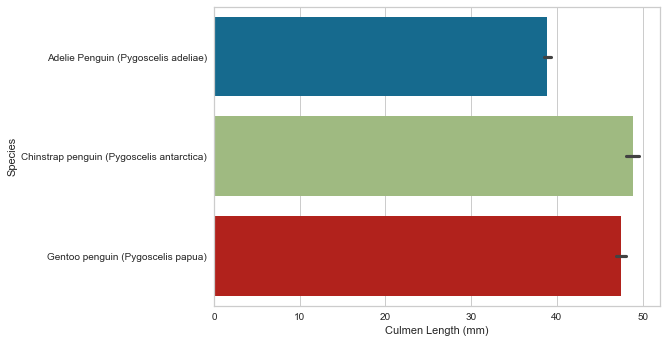

In [297]:
sns.barplot(x="Culmen Length (mm)", y="Species", data=pengu)

The Chinstrap penguin (Pygoscelis antarctica) is the specie with more of Culmen Length(dorsal ridge, i.e. backbone) measured in mm unit above.  

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Species'>

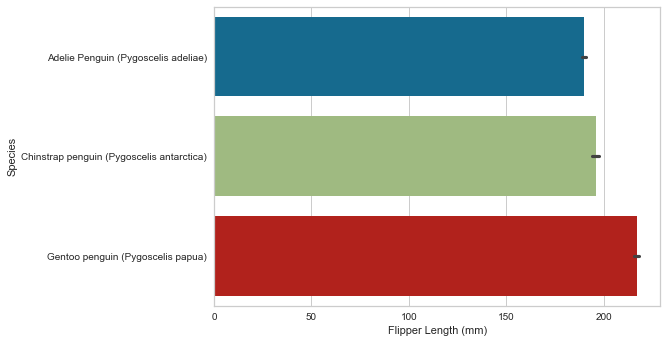

In [298]:
sns.barplot(x="Flipper Length (mm)", y="Species", data=pengu)

The Gentoo penguin (Pygoscelis papua) is specie with more of Flipper Length(wide flat limb, adapted for swimming) among the penguin species.

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Species'>

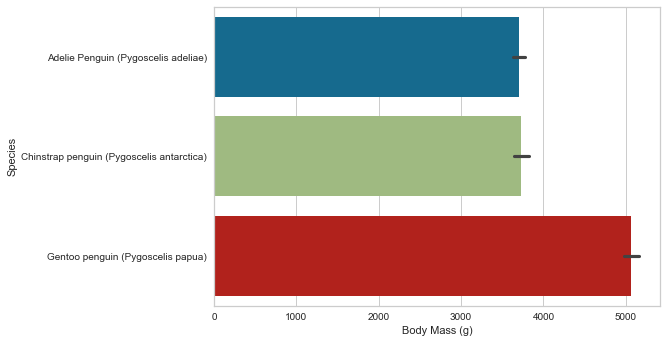

In [299]:
sns.barplot(x="Body Mass (g)", y="Species", data=pengu)

The Gentoo penguin (Pygoscelis papua) is the specie with more body mass(physical structure).

<AxesSubplot:xlabel='Delta 15 N (o/oo)', ylabel='Species'>

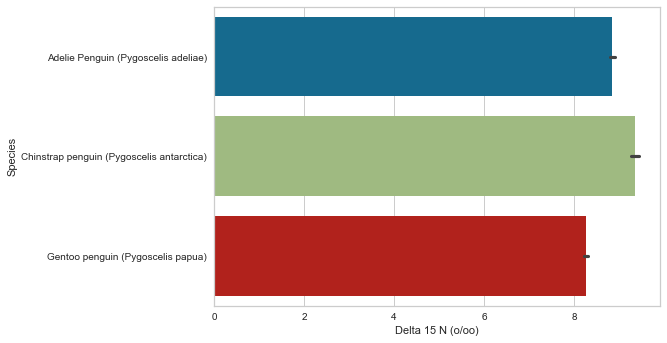

In [300]:
sns.barplot(x="Delta 15 N (o/oo)", y="Species", data=pengu)

The Chinstrap penguin (Pygoscelis antarctica) specie are found or live in the region with above chemical element than the other species.

<AxesSubplot:xlabel='Delta 13 C (o/oo)', ylabel='Species'>

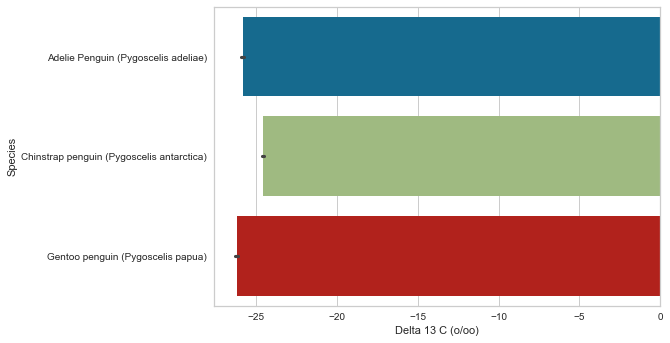

In [301]:
sns.barplot(x="Delta 13 C (o/oo)", y="Species", data=pengu)

The Gentoo penguin (Pygoscelis papua) is the specie that needs the lowest of the element above. 

<AxesSubplot:xlabel='studName', ylabel='Species'>

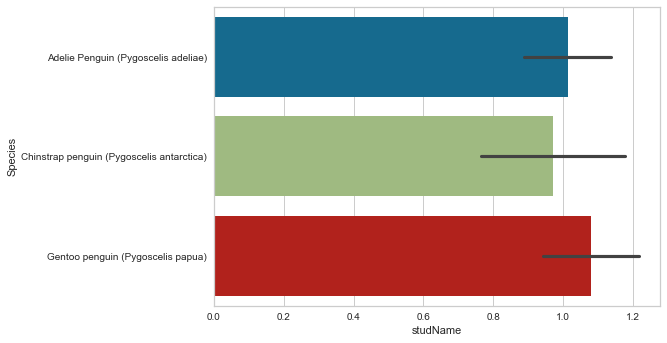

In [302]:
sns.barplot(x="studName", y="Species", data=pengu)

The Gentoo penguin (Pygoscelis papua) is the highest study specie name among the penguin species.

<AxesSubplot:xlabel='Islan', ylabel='Species'>

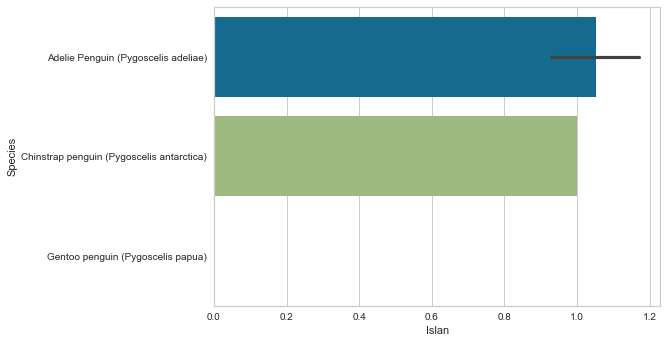

In [303]:
sns.barplot(x="Islan", y="Species", data=pengu)

Adelie Penguin (Pygoscelis adeliae) and Chinstrap penguin (Pygoscelis antarctica) are the penguin species that live or are found on the Island.

<AxesSubplot:xlabel='Clutch Completi', ylabel='Species'>

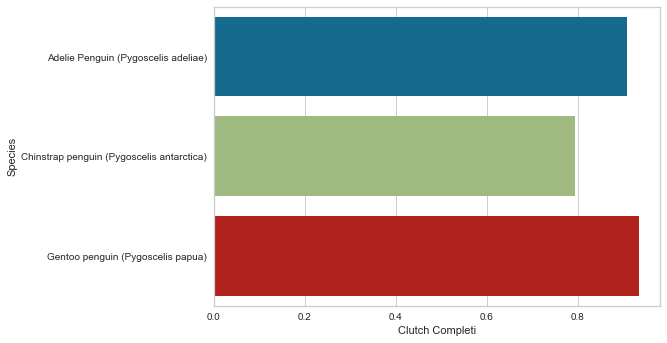

In [309]:
sns.barplot(x="Clutch Completi", y="Species", data=pengu, ci = True)

The Gentoo penguin (Pygoscelis papua) specie is of more of clutch(claw) completion.

<AxesSubplot:xlabel='sex', ylabel='Species'>

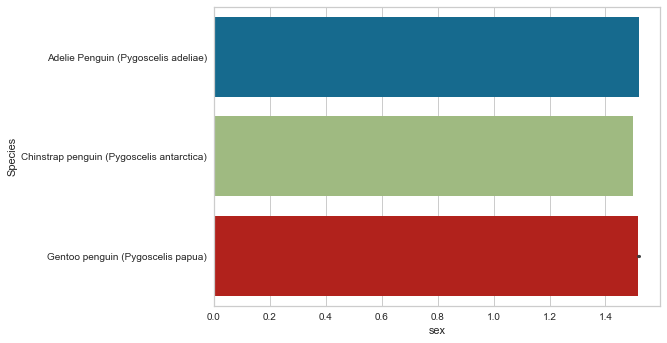

In [308]:
sns.barplot(x="sex", y="Species", data=pengu, ci = True)

In [ ]:
The Gentoo penguin (Pygoscelis papua) sex is more among the species. 

In [310]:
pengu.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),studName,Islan,Clutch Completi,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,63.151163,43.925000,17.152035,200.892442,4200.872093,8.730086,-25.691855,1.029070,0.662791,0.895349,1.514535
std,40.430199,5.443792,1.969060,14.023826,799.696532,0.540630,0.779277,0.818356,0.726194,0.306549,0.506308
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000,0.000000,0.000000,0.000000
25%,29.000000,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460,0.000000,0.000000,1.000000,1.000000
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000,1.000000,1.000000,2.000000
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467,2.000000,1.000000,1.000000,2.000000
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000,2.000000,1.000000,2.000000


<AxesSubplot:>

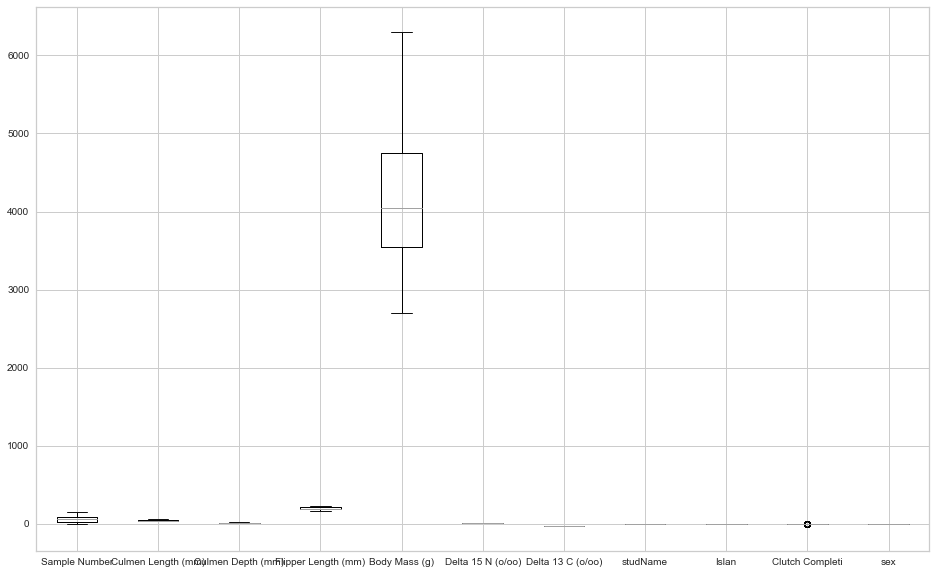

In [311]:
plt.figure(figsize=(16, 10))
pengu.boxplot()

<AxesSubplot:>

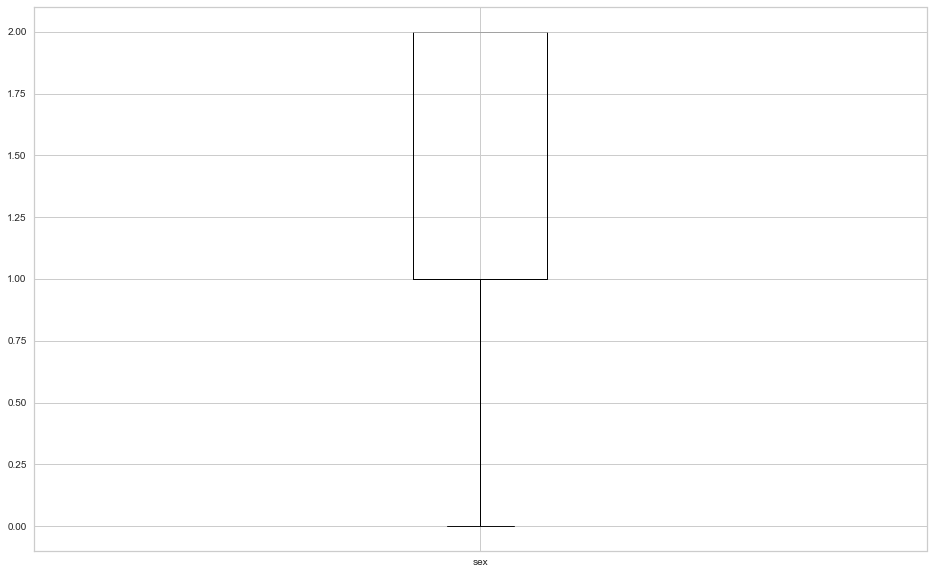

In [312]:
plt.figure(figsize=(16, 10))
pengu.boxplot(['sex'])

In [314]:
y = pengu['Species']
X = pengu.drop(columns=['Species'])

<AxesSubplot:>

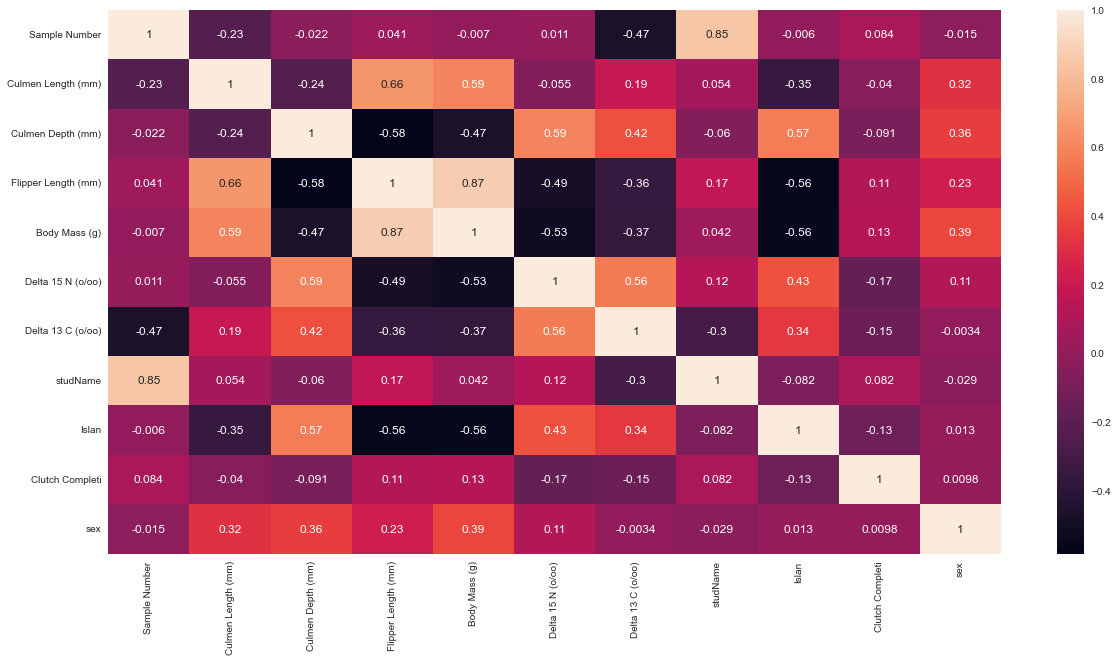

In [315]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), annot = True)

In [316]:
def calcu_mult(pengu):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [317]:
calcu_mult(X)

,variables,VIF
0,Sample Number,20.987049
1,Culmen Length (mm),224.250769
2,Culmen Depth (mm),213.367340
3,Flipper Length (mm),1298.625917
4,Body Mass (g),183.947457
5,Delta 15 N (o/oo),452.263736
6,Delta 13 C (o/oo),909.340723
7,studName,14.046520
8,Islan,3.314138
9,Clutch Completi,10.089142


In [318]:
y = pengu['Species']
x = pengu.drop(columns=['Species'], axis=1)

In [319]:
y.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [320]:
sample = SMOTE(random_state=45)
x,y = sample.fit_resample(x, y)

In [321]:
y.value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)    152
Gentoo penguin (Pygoscelis papua)            152
Name: Species, dtype: int64

In [322]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [323]:
Scaler = StandardScaler()
X_train_norm = pd.DataFrame(Scaler.fit_transform(X_train))

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_train_norm, y_train, test_size=.20, random_state=45)

In [324]:
model = PCA(n_components = 11)
model_ = model.fit(X_train_scale, y_train_scale)

In [325]:
pca = PCA(n_components=11)
model = pca.fit(X_train_scale)
PCA(n_components = 11)
print(model.explained_variance_ratio_)

[0.36207147 0.20464898 0.17052506 0.08116002 0.07498991 0.03930605
 0.02114475 0.01714183 0.01339599 0.00852377 0.00709218]


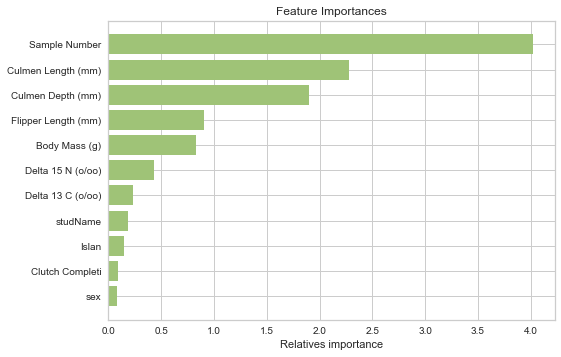

In [326]:
features = x.columns
importances = model_.explained_variance_
indices = np.argsort(importances)[-12:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

Text(0.5, 1.0, 'elbow_method')

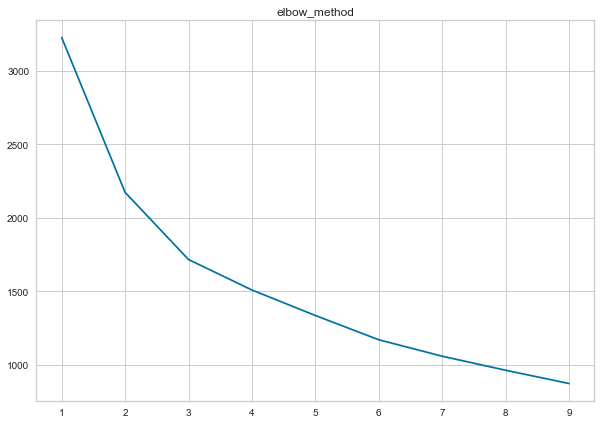

In [327]:
lst = []
for ks in range(1, 10):
    km = KMeans(n_clusters = ks)
    kmeans = km.fit(X_train_scale)
    lst.append(kmeans.inertia_)

fig = plt.figure(figsize = (10, 7))
plt.plot(range(1, 10), lst)
plt.grid(True)
plt.title("elbow_method")

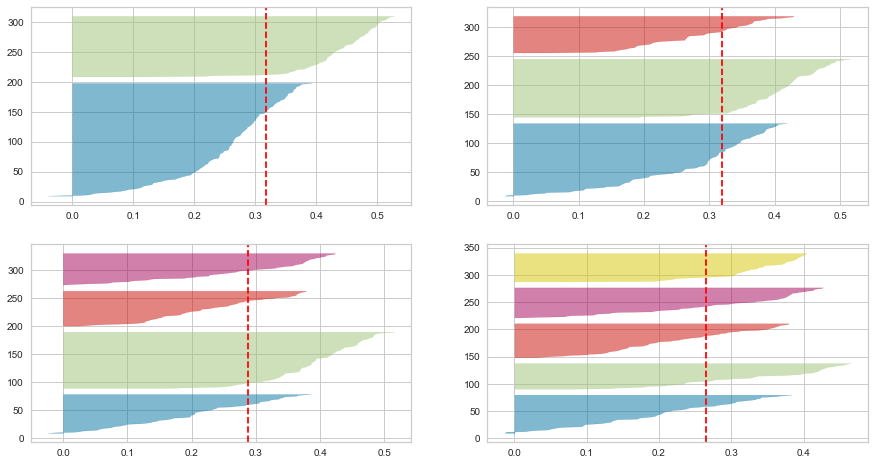

In [328]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train_scale)

In [329]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh_ = neigh.fit(X_train_scale, y_train_scale)
pred_y = neigh_.predict(X_test)
print("Accuracy of model at K = 5 is", metrics.accuracy_score(y_test, pred_y))
# # model_

Accuracy of model at K = 5 is 0.33695652173913043


c:\users\saheed\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [330]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh_ = neigh.fit(X_train_scale, y_train_scale)
neigh_

KNeighborsClassifier()

In [331]:
coef_deter = neigh_.score(X_train_scale, y_train_scale)
coef_deter

0.993127147766323

In [335]:
y_predict = neigh_.predict(X_test_scale)

In [336]:
cf_matrix = confusion_matrix(y_test_scale, y_predict)
cf_matrix

array([[26,  1,  0],
       [ 0, 26,  0],
       [ 1,  0, 19]], dtype=int64)

In [337]:
print(confusion_matrix(y_test_scale, y_predict))
print(classification_report(y_test_scale, y_predict))

[[26  1  0]
 [ 0 26  0]
 [ 1  0 19]]
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.96      0.96      0.96        27
Chinstrap penguin (Pygoscelis antarctica)       0.96      1.00      0.98        26
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.97        20

                                 accuracy                           0.97        73
                                macro avg       0.98      0.97      0.97        73
                             weighted avg       0.97      0.97      0.97        73

